In [ ]:
# Exsersize for KNN ( K nearest Naiborse )
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import load_digits
dig  = load_digits()

In [ ]:
dig

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [ ]:
df = pd.DataFrame(dig.data, columns = dig.feature_names)
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [ ]:
df['target'] = dig.target
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [ ]:
x = df.drop('target', axis = 1)
y = df['target']

In [ ]:
sns.scatterplot(x, y)

TypeError: scatterplot() takes from 0 to 1 positional arguments but 2 were given

# Task
Explain the provided Python code, which uses the scikit-learn `load_digits` dataset. To aid in the explanation, generate visualizations that help in understanding the dataset's structure and content.

## Display sample images

### Subtask:
Show some of the handwritten digit images from the dataset.


**Reasoning**:
Display some of the handwritten digit images from the dataset using matplotlib.



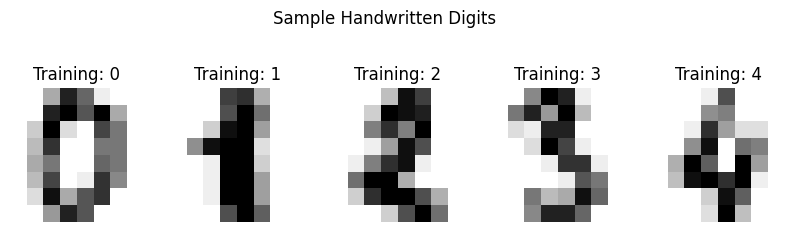

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))
for ax, image, label in zip(axes, dig.images, dig.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

plt.suptitle('Sample Handwritten Digits')
plt.show()

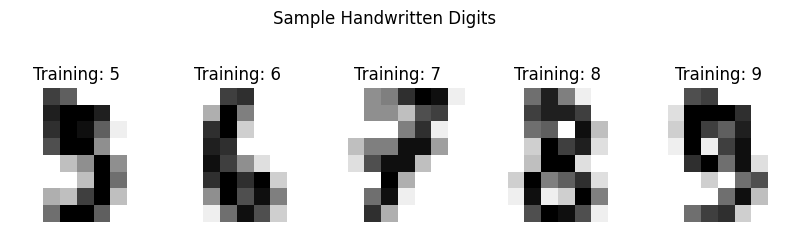

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(10, 3))
digits_to_show = [5, 6, 7, 8, 9]
for ax, digit in zip(axes, digits_to_show):
    ax.set_axis_off()
    image = dig.images[digit]
    label = dig.target[digit]
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

plt.suptitle('Sample Handwritten Digits')
plt.show()

## Data visualizer

### Subtask:
Retry plotting the digit distribution after the previous failure.


**Reasoning**:
The previous attempt to create a scatterplot failed because `scatterplot` was used incorrectly. To visualize the distribution of digits, which is a categorical variable, `countplot` is the appropriate function. I will now use `countplot` to plot the distribution of the `target` variable and add a title for clarity.



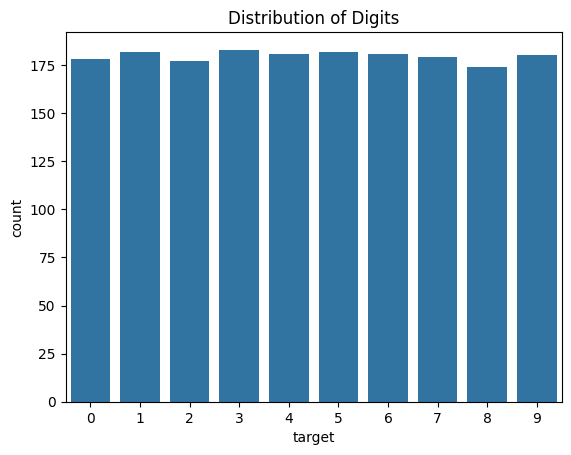

In [ ]:
sns.countplot(x='target', data=df)
plt.title('Distribution of Digits')
plt.show()

## Data visualizer

### Subtask:
Visualize the data with PCA.


**Reasoning**:
The previous scatterplot failed because of incorrect usage of the function. To visualize the data with PCA, I need to perform PCA dimensionality reduction and then plot the results. The instructions outline the steps to achieve this: import PCA, fit and transform the data, create a new dataframe for the PCA components and the target, and finally create a scatter plot using seaborn.



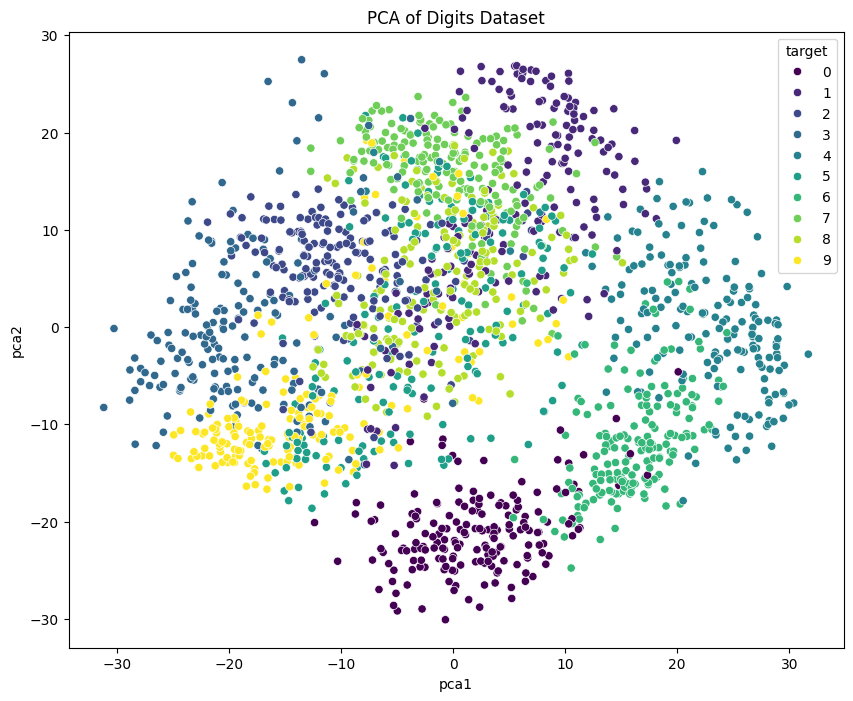

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

df_pca = pd.DataFrame(x_pca, columns=['pca1', 'pca2'])
df_pca['target'] = df['target']

plt.figure(figsize=(10, 8))
sns.scatterplot(x='pca1', y='pca2', hue='target', data=df_pca, palette='viridis', legend='full')
plt.title('PCA of Digits Dataset')
plt.show()

## Summary:

### Q&A
**How is the `load_digits` dataset structured?**

The `load_digits` dataset from scikit-learn contains handwritten digit images. Each image is an 8x8 pixel grayscale representation of a digit from 0 to 9. The dataset is well-balanced, with each digit having approximately 180 samples.

### Data Analysis Key Findings
*   **Dataset Composition:** The dataset consists of 8x8 pixel images of handwritten digits (0-9).
*   **Class Distribution:** The dataset is well-balanced, with each digit class having roughly the same number of samples, around 180 each.
*   **Data Separability:** Visualizing the data using Principal Component Analysis (PCA) shows that the different digit classes form distinct clusters. This suggests that the classes are largely separable even after reducing the data's dimensionality to two components.

### Insights or Next Steps
*   **Model Building:** The clear separation of classes in the PCA plot indicates that a classification model, such as a Support Vector Machine (SVM) or a simple neural network, is likely to perform well on this dataset.
*   **Further Exploration:** While PCA provides a good overview, using other dimensionality reduction techniques like t-SNE could offer a different and potentially clearer visualization of the data clusters.


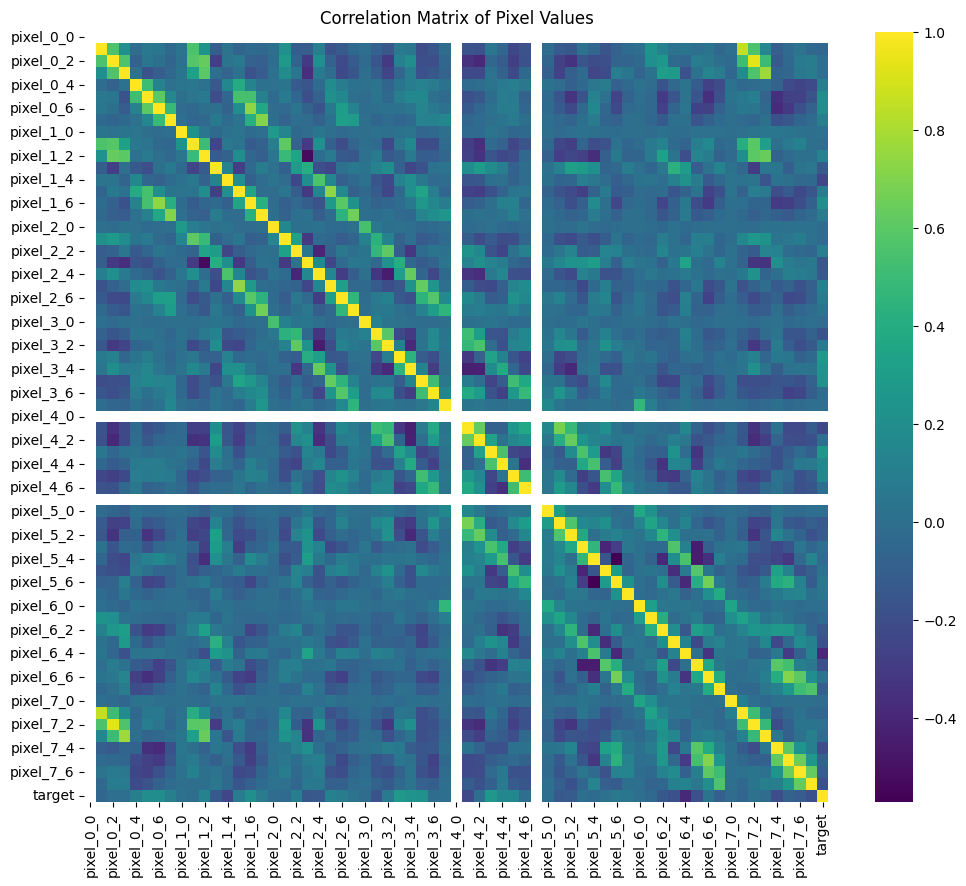

In [ ]:
corr = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=False, cmap='viridis')
plt.title('Correlation Matrix of Pixel Values')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x, y , test_size = 0.2 , random_state = 42)

In [ ]:
x_test

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
1245,0.0,0.0,0.0,7.0,12.0,0.0,0.0,0.0,0.0,0.0,...,16.0,2.0,0.0,0.0,0.0,9.0,14.0,14.0,5.0,0.0
220,0.0,0.0,11.0,16.0,8.0,0.0,0.0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,13.0,16.0,11.0,1.0,0.0,0.0
1518,0.0,0.0,8.0,15.0,12.0,4.0,0.0,0.0,0.0,5.0,...,7.0,0.0,0.0,0.0,13.0,16.0,15.0,8.0,0.0,0.0
438,0.0,0.0,2.0,12.0,12.0,12.0,9.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,15.0,3.0,0.0,0.0,0.0
1270,0.0,2.0,13.0,16.0,10.0,0.0,0.0,0.0,0.0,6.0,...,14.0,0.0,0.0,3.0,15.0,16.0,16.0,10.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1731,0.0,0.0,0.0,2.0,14.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,10.0,0.0,0.0,0.0
1630,0.0,0.0,6.0,16.0,15.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,16.0,16.0,12.0,1.0,0.0
1037,0.0,0.0,7.0,15.0,16.0,8.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,5.0,11.0,10.0,10.0,0.0,0.0
965,0.0,0.0,7.0,16.0,12.0,1.0,0.0,0.0,0.0,0.0,...,14.0,0.0,0.0,0.0,7.0,16.0,16.0,16.0,4.0,0.0


In [ ]:
y_test

,target
1245,6
220,9
1518,3
438,7
1270,2
...,...
1731,4
1630,3
1037,8
965,3


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train , y_train)

KNeighborsClassifier(n_neighbors=6)

In [ ]:
knn.score(x_test, y_test)

0.9888888888888889

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[33,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 28,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 34,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 46,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 35,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 33,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 30,  0],
       [ 0,  0,  0,  0,  1,  1,  0,  0,  0, 38]])

Text(50.722222222222214, 0.5, 'Truth')

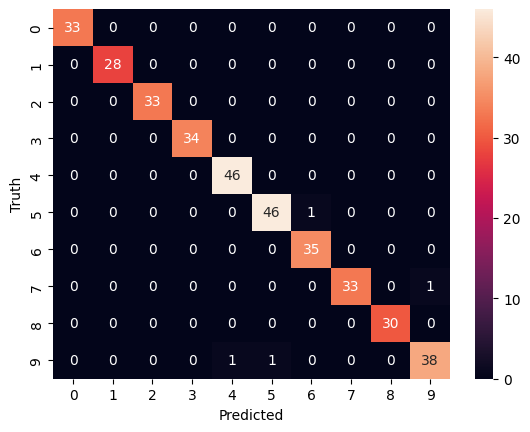

In [ ]:
sns.heatmap(cm, annot= True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')

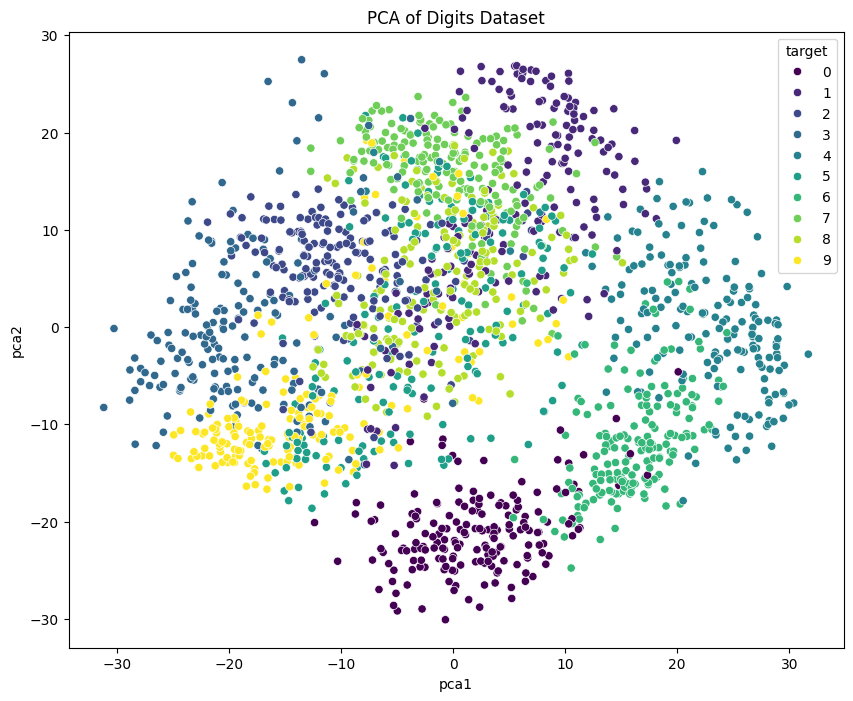

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

df_pca = pd.DataFrame(x_pca, columns=['pca1', 'pca2'])
df_pca['target'] = df['target']

plt.figure(figsize=(10, 8))
sns.scatterplot(x='pca1', y='pca2', hue='target', data=df_pca, palette='viridis', legend='full')
plt.title('PCA of Digits Dataset')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred)

SyntaxError: incomplete input (ipython-input-72-2684233057.py, line 3)